# KAMPING Tutorial 1. Introduction and basic use

Date created: 2024-10-25

In [124]:
# Import kamping library before starting the tutorial
import kamping

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Download KGML files

Next, we need to get the KGML file from KEGG. You can manually download the KGML file from the KEGG website or use the convenient `kamping.kgml` function to download the KGML file. The `kamping.kgml` function will download the KGML file of speificed speice from the KEGG website and save it to the specified directory.

In [59]:
 # you can toggle verbose to False if you don't want to see the progress
# replace ../data/kgml_hsa with your desired directory
kamping.kgml('hsa', out_dir='../data/kgml_hsa', verbose=True)

INFO:kamping.parser.utils:Now acquiring all KGML files for Homo sapiens (human)...
INFO:kamping.parser.utils:Now acquiring pathway hsa01100...
INFO:kamping.parser.utils:Now acquiring pathway hsa01200...
INFO:kamping.parser.utils:Now acquiring pathway hsa01210...
INFO:kamping.parser.utils:Now acquiring pathway hsa01212...
INFO:kamping.parser.utils:Now acquiring pathway hsa01230...
INFO:kamping.parser.utils:Now acquiring pathway hsa01232...
INFO:kamping.parser.utils:Now acquiring pathway hsa01250...
INFO:kamping.parser.utils:Now acquiring pathway hsa01240...
INFO:kamping.parser.utils:Now acquiring pathway hsa00010...
INFO:kamping.parser.utils:Now acquiring pathway hsa00020...
INFO:kamping.parser.utils:Now acquiring pathway hsa00030...
INFO:kamping.parser.utils:Now acquiring pathway hsa00040...
INFO:kamping.parser.utils:Now acquiring pathway hsa00051...
INFO:kamping.parser.utils:Now acquiring pathway hsa00052...
INFO:kamping.parser.utils:Now acquiring pathway hsa00053...
INFO:kamping.pars

## 2. Create a graph

Assume you have downloaded the KGML files, now you can use the `kamping.KeggGraph` class to load the KGML file. The `kamping.KeggGraph` class will parse the KGML file and create a instance of a customized KeggGraph class storing all necessary information and allow access to them through API easily.

There are three type of graph that can be created from the KGML file: mixed, gene, and metabolite. The mixed graph will contain both gene and metabolite nodes, gene graph will contain only gene nodes, and metabolite graph will contain only metabolite nodes. "gene" and "metabolite" type are created through node propagation.

Now, let's create a mixed graph from the KGML file hsa00010.xml.

In [108]:
mixed_graph = kamping.KeggGraph('../data/kgml_hsa/hsa00010.xml', type='mixed',gene_group_as_interaction=False, multi_substrate_as_interaction=False, auto_correction='fix',
                  directed=True, verbose=True)

INFO:KeggGraph:Now parsing: path:hsa00010...
INFO:KeggGraph:Graph path:hsa00010 parsed successfully!


KeggGraph class has a lot of useful attributes and methods. For example, you can access the nodes and edges of the graph through the `nodes` and `edges` attributes.

In [84]:
mixed_graph.nodes

['hsa:10327',
 'hsa:124',
 'hsa:125',
 'hsa:126',
 'hsa:127',
 'hsa:128',
 'hsa:130',
 'hsa:130589',
 'hsa:131',
 'hsa:160287',
 'hsa:1737',
 'hsa:1738',
 'hsa:2023',
 'hsa:2026',
 'hsa:2027',
 'hsa:217',
 'hsa:218',
 'hsa:219',
 'hsa:2203',
 'hsa:221',
 'hsa:222',
 'hsa:223',
 'hsa:224',
 'hsa:226',
 'hsa:229',
 'hsa:230',
 'hsa:2538',
 'hsa:2597',
 'hsa:26330',
 'hsa:2645',
 'hsa:2821',
 'hsa:3098',
 'hsa:3099',
 'hsa:3101',
 'hsa:387712',
 'hsa:3939',
 'hsa:3945',
 'hsa:3948',
 'hsa:441531',
 'hsa:501',
 'hsa:5105',
 'hsa:5106',
 'hsa:5160',
 'hsa:5161',
 'hsa:5162',
 'hsa:5211',
 'hsa:5213',
 'hsa:5214',
 'hsa:5223',
 'hsa:5224',
 'hsa:5230',
 'hsa:5232',
 'hsa:5236',
 'hsa:5313',
 'hsa:5315',
 'hsa:55276',
 'hsa:55902',
 'hsa:57818',
 'hsa:669',
 'hsa:7167',
 'hsa:80201',
 'hsa:83440',
 'hsa:84532',
 'hsa:8789',
 'hsa:92483',
 'hsa:92579',
 'hsa:9562',
 'cpd:C00022',
 'cpd:C00024',
 'cpd:C00033',
 'cpd:C00036',
 'cpd:C00068',
 'cpd:C00074',
 'cpd:C00084',
 'cpd:C00085',
 'cpd:C001

You can access the edges of the graph through the `edges` attribute.

In [85]:
mixed_graph.edges

,entry1,entry2,type,subtype_name,subtype_value,entry1_type,entry2_type
0,cpd:C00022,hsa:160287,PCrel,reaction,rn:R00703,compound,gene
1,cpd:C00022,hsa:3939,PCrel,reaction,rn:R00703,compound,gene
2,cpd:C00022,hsa:3945,PCrel,reaction,rn:R00703,compound,gene
3,cpd:C00022,hsa:3948,PCrel,reaction,rn:R00703,compound,gene
4,cpd:C00022,hsa:5160,PCrel,reaction,rn:R00014,compound,gene
...,...,...,...,...,...,...,...
264,hsa:8789,cpd:C00085,PCrel,reaction,rn:R00762,gene,compound
265,hsa:92483,cpd:C00022,PCrel,reaction,rn:R00703,gene,compound
266,hsa:92483,cpd:C00186,PCrel,reaction,rn:R00703,gene,compound
267,hsa:92579,cpd:C00267,PCrel,reaction,rn:R01788,gene,compound


You can also check gene and compound nodes separately.

In [86]:
mixed_graph.genes

['hsa:10327',
 'hsa:124',
 'hsa:125',
 'hsa:126',
 'hsa:127',
 'hsa:128',
 'hsa:130',
 'hsa:130589',
 'hsa:131',
 'hsa:160287',
 'hsa:1737',
 'hsa:1738',
 'hsa:2023',
 'hsa:2026',
 'hsa:2027',
 'hsa:217',
 'hsa:218',
 'hsa:219',
 'hsa:2203',
 'hsa:221',
 'hsa:222',
 'hsa:223',
 'hsa:224',
 'hsa:226',
 'hsa:229',
 'hsa:230',
 'hsa:2538',
 'hsa:2597',
 'hsa:26330',
 'hsa:2645',
 'hsa:2821',
 'hsa:3098',
 'hsa:3099',
 'hsa:3101',
 'hsa:387712',
 'hsa:3939',
 'hsa:3945',
 'hsa:3948',
 'hsa:441531',
 'hsa:501',
 'hsa:5105',
 'hsa:5106',
 'hsa:5160',
 'hsa:5161',
 'hsa:5162',
 'hsa:5211',
 'hsa:5213',
 'hsa:5214',
 'hsa:5223',
 'hsa:5224',
 'hsa:5230',
 'hsa:5232',
 'hsa:5236',
 'hsa:5313',
 'hsa:5315',
 'hsa:55276',
 'hsa:55902',
 'hsa:57818',
 'hsa:669',
 'hsa:7167',
 'hsa:80201',
 'hsa:83440',
 'hsa:84532',
 'hsa:8789',
 'hsa:92483',
 'hsa:92579',
 'hsa:9562']

In [87]:
mixed_graph.compounds

['cpd:C00022',
 'cpd:C00024',
 'cpd:C00033',
 'cpd:C00036',
 'cpd:C00068',
 'cpd:C00074',
 'cpd:C00084',
 'cpd:C00085',
 'cpd:C00103',
 'cpd:C00111',
 'cpd:C00118',
 'cpd:C00186',
 'cpd:C00197',
 'cpd:C00221',
 'cpd:C00236',
 'cpd:C00267',
 'cpd:C00354',
 'cpd:C00469',
 'cpd:C00631',
 'cpd:C00668',
 'cpd:C01159',
 'cpd:C01172',
 'cpd:C05125',
 'cpd:C15972',
 'cpd:C15973',
 'cpd:C16255']

In [125]:
mixed_graph.name

'path:hsa00010'

A summary and some statistics of the graph can be obtained through directly call the graph object.

Let's check the summary of the graph. You can see now the gene ID type is changed to uniprot. You might also notice the number of gene nodes and edges increase after the id conversion. This is because the a single gene node can be converted to multiple uniprot nodes, and the edge is expanded to connect all the uniprot nodes to the original destination node (that node could also be expanded).

In [105]:
mixed_graph

KEGG Pathway: 
            [Title]: Glycolysis / Gluconeogenesis
            [Name]: path:hsa00010
            [Org]: hsa
            [Link]: https://www.kegg.jp/kegg-bin/show_pathway?hsa00010
            [Image]: https://www.kegg.jp/kegg/pathway/hsa/hsa00010.png
            [Link]: https://www.kegg.jp/kegg-bin/show_pathway?hsa00010
            Graph type: mixed 
            Number of Proteins: 104
            Number of Compounds: 26
            Gene ID type : uniprot
            Compound ID type : kegg
            Number of Nodes: 130
            Number of Edges: 424

The KeggGraph class enable you to whether parse derived edges of different types though parameter `gene_group_as_interaction` and `multi_substrate_as_interaction`. The `gene_group_as_interaction` parameter is to parse the gene group as interaction between genes, and the `multi_substrate_as_interaction` parameter is to parse the multi-substrate and multi-product reaction as interaction between the substrate and the product. The `auto_correction` parameter is to fix the error in the KGML file. The `verbose` parameter is to show the progress of the parsing.

In [114]:
mixed_graph_all = kamping.KeggGraph('../data/kgml_hsa/hsa00010.xml', type='mixed',gene_group_as_interaction=True, multi_substrate_as_interaction=True, auto_correction='fix',
                    directed=True, verbose=True)

INFO:KeggGraph:Now parsing: path:hsa00010...
INFO:KeggGraph:Graph path:hsa00010 parsed successfully!


You can see now two new derived edge types "multi-substrate" and "multi-product" are added to the graph.

In [121]:
mixed_graph_all.edges[['type', 'subtype_name']].drop_duplicates()

,type,subtype_name
0,CCrel,multi-substrate
1,PCrel,reaction
24,CCrel,multi-product


Let create gene-only and metabolite-only graphs from the same KGML file.

In [110]:
gene_graph = kamping.KeggGraph('../data/kgml_hsa/hsa00010.xml', type='gene',gene_group_as_interaction=False, multi_substrate_as_interaction=False, auto_correction='fix',
                  directed=True, verbose=True)
metabolite_graph = kamping.KeggGraph('../data/kgml_hsa/hsa00010.xml', type='metabolite',gene_group_as_interaction=False, multi_substrate_as_interaction=False, auto_correction='fix',
                    directed=True, verbose=True)

INFO:KeggGraph:Now parsing: path:hsa00010...
INFO:KeggGraph:Graph path:hsa00010 parsed successfully!
INFO:KeggGraph:Now parsing: path:hsa00010...
INFO:KeggGraph:Graph path:hsa00010 parsed successfully!


In [111]:
gene_graph

KEGG Pathway: 
            [Title]: Glycolysis / Gluconeogenesis
            [Name]: path:hsa00010
            [Org]: hsa
            [Link]: https://www.kegg.jp/kegg-bin/show_pathway?hsa00010
            [Image]: https://www.kegg.jp/kegg/pathway/hsa/hsa00010.png
            [Link]: https://www.kegg.jp/kegg-bin/show_pathway?hsa00010
            Graph type: gene 
            Number of Genes: 67
            Number of Compounds: 0
            Gene ID type : kegg
            Compound ID type : kegg
            Number of Nodes: 67
            Number of Edges: 524

In [113]:
gene_graph.edges

,entry1,entry2,type,subtype_name,subtype_value,entry1_type,entry2_type
0,hsa:10327,hsa:124,PPrel,compound-propagation,custom,gene,gene
1,hsa:10327,hsa:125,PPrel,compound-propagation,custom,gene,gene
2,hsa:10327,hsa:126,PPrel,compound-propagation,custom,gene,gene
3,hsa:10327,hsa:127,PPrel,compound-propagation,custom,gene,gene
4,hsa:10327,hsa:128,PPrel,compound-propagation,custom,gene,gene
...,...,...,...,...,...,...,...
519,hsa:9562,hsa:387712,PPrel,compound-propagation,custom,gene,gene
520,hsa:9562,hsa:441531,PPrel,compound-propagation,custom,gene,gene
521,hsa:9562,hsa:5223,PPrel,compound-propagation,custom,gene,gene
522,hsa:9562,hsa:5224,PPrel,compound-propagation,custom,gene,gene


In [112]:
metabolite_graph

KEGG Pathway: 
            [Title]: Glycolysis / Gluconeogenesis
            [Name]: path:hsa00010
            [Org]: hsa
            [Link]: https://www.kegg.jp/kegg-bin/show_pathway?hsa00010
            [Image]: https://www.kegg.jp/kegg/pathway/hsa/hsa00010.png
            [Link]: https://www.kegg.jp/kegg-bin/show_pathway?hsa00010
            Graph type: metabolite 
            Number of Genes: 0
            Number of Compounds: 26
            Gene ID type : kegg
            Compound ID type : kegg
            Number of Nodes: 26
            Number of Edges: 56

## Convert id in the graph

Sometimes, the id of nodes in the graph is not the same as the id of interest. You can convert the id in the graph to the id in the database through the kamping.Converter class. The Converter class will convert the id of the nodes in the graph to the id of target.

The Converter need to be initial with spice and the target of the gene and compound conversion. The available options for gene are "kegg", "uniprot' and "ncbi" (also known as "entrez"), and the available options for compound are "kegg" and "chebi", and "pubchem". The option "kegg" is to keep the original id in the graph for gene or compound if the convert is only want to convert one type of node.

In [102]:
# initial a converter object
converter = kamping.Converter('hsa', gene_target='uniprot', compound_target='kegg')
converter.convert(mixed_graph)

INFO:root:Conversion of path:hsa00010 complete!


In [104]:
# now the id of the gene nodes in the graph is converted to uniprot id
mixed_graph.genes

['up:P14550',
 'up:V9HWI0',
 'up:P07327',
 'up:P00325',
 'up:V9HW50',
 'up:P00326',
 'up:P08319',
 'up:V9HVX7',
 'up:P11766',
 'up:Q6IRT1',
 'up:P28332',
 'up:Q8IUN7',
 'up:Q96C23',
 'up:A0A384MDW6',
 'up:P40394',
 'up:Q6ZMR3',
 'up:P10515',
 'up:Q86YI5',
 'up:P09622',
 'up:A0A024R713',
 'up:P06733',
 'up:A0A024R4F1',
 'up:P09104',
 'up:Q6FHV6',
 'up:P13929',
 'up:P05091',
 'up:A0A384NPN7',
 'up:P30838',
 'up:Q6PKA6',
 'up:P30837',
 'up:A0A384MTJ7',
 'up:P09467',
 'up:P43353',
 'up:P49189',
 'up:P51648',
 'up:P04075',
 'up:V9HWN7',
 'up:P05062',
 'up:P09972',
 'up:A0A024QZ64',
 'up:P35575',
 'up:P04406',
 'up:V9HVZ4',
 'up:O14556',
 'up:A0A0K0K1K1',
 'up:P35557',
 'up:Q53Y25',
 'up:P06744',
 'up:P19367',
 'up:B3KXY9',
 'up:A8K7J7',
 'up:Q59FD4',
 'up:P52789',
 'up:P52790',
 'up:A6NNW6',
 'up:P00338',
 'up:V9HWB9',
 'up:P07195',
 'up:Q5U077',
 'up:P07864',
 'up:A0A140VKA7',
 'up:Q8N0Y7',
 'up:P49419',
 'up:P35558',
 'up:Q16822',
 'up:A0A384MTT2',
 'up:P08559',
 'up:P29803',
 'up:P11177'

For batch processing a directory of KGML files please check tutorial 2

## 3. Convert to networkx graph and Visualization

You can easily convert the KeggGrpah object to a networkx graph object through the `to_networkx` method to use the popular networkx library for network analysis.

In [101]:
import networkx as nx
mixed_graph_nx = mixed_graph.to_networkx()
print(mixed_graph_nx)
# node attributes available now is "node_type" represent the type of the node
nx.get_node_attributes(mixed_graph_nx, name='node_type')

DiGraph named 'path:hsa00010' with 93 nodes and 263 edges


{'cpd:C00022': 'compound',
 'hsa:160287': 'gene',
 'hsa:3939': 'gene',
 'hsa:3945': 'gene',
 'hsa:3948': 'gene',
 'hsa:5160': 'gene',
 'hsa:5161': 'gene',
 'hsa:5162': 'gene',
 'hsa:92483': 'gene',
 'cpd:C00024': 'compound',
 'hsa:1737': 'gene',
 'cpd:C00033': 'compound',
 'hsa:217': 'gene',
 'hsa:218': 'gene',
 'hsa:219': 'gene',
 'hsa:221': 'gene',
 'hsa:222': 'gene',
 'hsa:223': 'gene',
 'hsa:224': 'gene',
 'hsa:501': 'gene',
 'hsa:55902': 'gene',
 'hsa:84532': 'gene',
 'cpd:C00036': 'compound',
 'hsa:5105': 'gene',
 'hsa:5106': 'gene',
 'cpd:C00068': 'compound',
 'cpd:C00074': 'compound',
 'hsa:2023': 'gene',
 'hsa:2026': 'gene',
 'hsa:2027': 'gene',
 'hsa:387712': 'gene',
 'hsa:5313': 'gene',
 'hsa:5315': 'gene',
 'cpd:C00084': 'compound',
 'hsa:10327': 'gene',
 'hsa:124': 'gene',
 'hsa:125': 'gene',
 'hsa:126': 'gene',
 'hsa:127': 'gene',
 'hsa:128': 'gene',
 'hsa:130': 'gene',
 'hsa:131': 'gene',
 'cpd:C00085': 'compound',
 'hsa:2821': 'gene',
 'hsa:5211': 'gene',
 'hsa:5213': '

You might notice the number of edges in the networkx graph object is different from the number of edges in the KeggGraph object. This is because the edges in KeggGraph can have subtype, and the returned networkx graph object will only keep consider main edge types from "PCrel", "PPrel", "CCrel", and "GErel". You can access the edge type through the `edge_type` attribute.

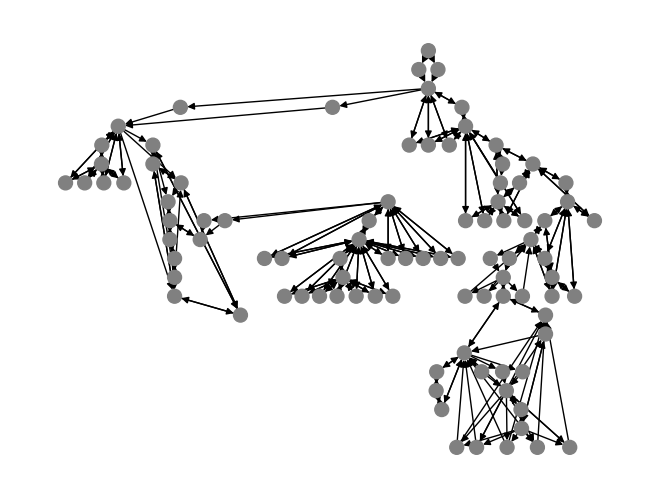

In [90]:
from matplotlib import pyplot as plt
import networkx as nx

graph_nx = mixed_graph.to_networkx()
color_map = {'compound': 'green', 'gene': 'blue'}

# Extract node types
node_types = nx.get_node_attributes(graph_nx, 'type')
node_colors = [color_map.get(node_types.get(node), 'gray') for node in graph_nx.nodes]
# set label positions offset y 

pos = nx.nx_agraph.graphviz_layout(graph_nx, prog='dot')  # positions for all nodes
label_pos = {node: (pos[0], pos[1]-20) for node, pos in pos.items()}
nx.draw(graph_nx, node_size=100, pos=pos, node_color=node_colors, with_labels=False)
# nx.draw_networkx_labels(graph_nx, pos=label_pos, labels={node: node for node in graph_nx.nodes})

In [25]:
from torch_geometric.loader import DataLoader

dataloader = DataLoader(pyg_graphs, batch_size=32, shuffle=False)

In [26]:
from torch_geometric.utils import train_test_split_edges
from torch_geometric.utils import batched_negative_sampling

train_data = pyg_graphs[:100]
val_data = pyg_graphs[100:len(pyg_graphs)]
val_negative = batched_negative_sampling(val_data.edge_index, val_data.batch)

AttributeError: 'list' object has no attribute 'edge_index'

In [ ]:
from torch_geometric.nn.models import GCN

In [ ]:
import torch
import torch.nn.functional as F
from sklearn.metrics import roc_auc_score

from torch_geometric.utils import negative_sampling
from torch_geometric.datasets import Planetoid
import torch_geometric.transforms as T
from torch_geometric.nn import GCNConv, SAGEConv


class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = SAGEConv(1024, 128)
        self.conv2 = SAGEConv(128, 64)

    def encode(self, data):
        x = self.conv1(data.x, data.edge_index) # convolution 1
        x = x.relu()
        return self.conv2(x, data.edge_index) # convolution 2

    def decode(self, z, pos_edge_index, neg_edge_index): # only pos and neg edges
        edge_index = torch.cat([pos_edge_index, neg_edge_index], dim=-1) # concatenate pos and neg edges
        logits = (z[edge_index[0]] * z[edge_index[1]]).sum(dim=-1)  # dot product 
        return logits

    def decode_all(self, z):
        prob_adj = z @ z.t() # get adj NxN
        return (prob_adj > 0).nonzero(as_tuple=False).t() # get predicted edge_list 

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model, data = Net().to(device), data.to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

In [ ]:

def get_link_labels(pos_edge_index, neg_edge_index):
    # returns a tensor:
    # [1,1,1,1,...,0,0,0,0,0,..] with the number of ones is equel to the lenght of pos_edge_index
    # and the number of zeros is equal to the length of neg_edge_index
    E = pos_edge_index.size(1) + neg_edge_index.size(1)
    link_labels = torch.zeros(E, dtype=torch.float, device=device)
    link_labels[:pos_edge_index.size(1)] = 1.
    return link_labels


def train(data):
    model.train()

    neg_edge_index = batched_negative_sampling(data.edge_index, data.batch)
    optimizer.zero_grad()
    z = model.encode(data) #encode
    link_logits = model.decode(z, data.edge_index, neg_edge_index) # decode
    
    link_labels = get_link_labels(data.edge_index, neg_edge_index)
    loss = F.binary_cross_entropy_with_logits(link_logits, link_labels)
    loss.backward()
    optimizer.step()

    return loss


def test(data):
    model.eval()
    perfs = []
    for prefix in ["val", "test"]:
        pos_edge_index = data[f'{prefix}_pos_edge_index']
        neg_edge_index = data[f'{prefix}_neg_edge_index']

        z = model.encode() # encode train
        link_logits = model.decode(z, pos_edge_index, neg_edge_index) # decode test or val
        link_probs = link_logits.sigmoid() # apply sigmoid

        link_labels = get_link_labels(pos_edge_index, neg_edge_index) # get link

        perfs.append(roc_auc_score(link_labels.cpu(), link_probs.cpu())) #compute roc_auc score
    return perfs

In [ ]:
best_val_perf = test_perf = 0
for epoch in range(1, 501):
    batch_loss = 0
    for batch in dataloader:
        batch_loss = batch_loss + train(batch)
    train_loss = batch_loss / len(dataloader)
    log = 'Epoch: {:03d}, Loss: {:.4f}'
    print(log.format(epoch, train_loss))